# Tobig's 21기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크다운 또는 주석으로 설명해주세요

## 데이터

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
data = pd.read_csv('assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [7]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [8]:
# parameter 개수
N = len(X_train.loc[0])

In [9]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.99473185, 0.70144831, 0.26886274])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i\theta = \Sigma_{j=1}^Nx_{ij}\theta_j$

In [10]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)) :
        z += X[i] * parameters[i] #X 는 주어진 하나의 행
    return z

## Logistic Function

## $p = {1 \over {1 + e^{-X_i\theta}}}$

In [11]:
def logistic(X, parameters):
    z= dot_product(X, parameters)
    p = 1 / (1 + np.exp(-z))
    return p

In [12]:
logistic(X_train.iloc[1], parameters)
# 0.7100745563584836

0.8627310233654439

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$. 1/2 은 계산상의 편의를 위해 곱합니다
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 sum 형태까지만 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) = -\Sigma(y_ilogp(X_i) + (1-y_i)log(1-p(X_i)))$

In [13]:
def minus_log_cross_entropy_i(X, y, parameters): #i번째 
    p = logistic(X, parameters)
    loss = -y * np.log(p) - (1-y) * np.log(1-p)
    return loss

In [14]:
def mse_i(X, y, parameters):
    y_hat = dot_product(X, parameters.T)
    loss = np.square(y-y_hat) / 2
    return loss

In [15]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #data"set" 입력 / n: 현재 배치의 데이터 수
    loss = 0
    for i in range(n) :
        X = X_set.iloc[i]; y = y_set.iloc[i]
        loss += loss_function(X, y, parameters)
    loss = loss/n #loss 평균값으로 계산
    return loss

In [16]:
batch_loss(X_test, y_test, parameters, mse_i, len(X_test))

1.1154966175545387

In [17]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

1.322920645771942

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

- gradient란, MSE값을 각 $\theta$ 대해 편미분한 값을 벡터화시키는 것
- 2차함수를 기준으로, gradient 값이 양수면 목적함수가 증가하고 있다는 것이므로 $\theta$를 더 작은 방향으로 움직여야 한다
- 반대로 gradient 값이 음수면 목적함수가 감소하고 있다는 것이므로 $\theta$를 더 큰 방향으로 움직여야 한다

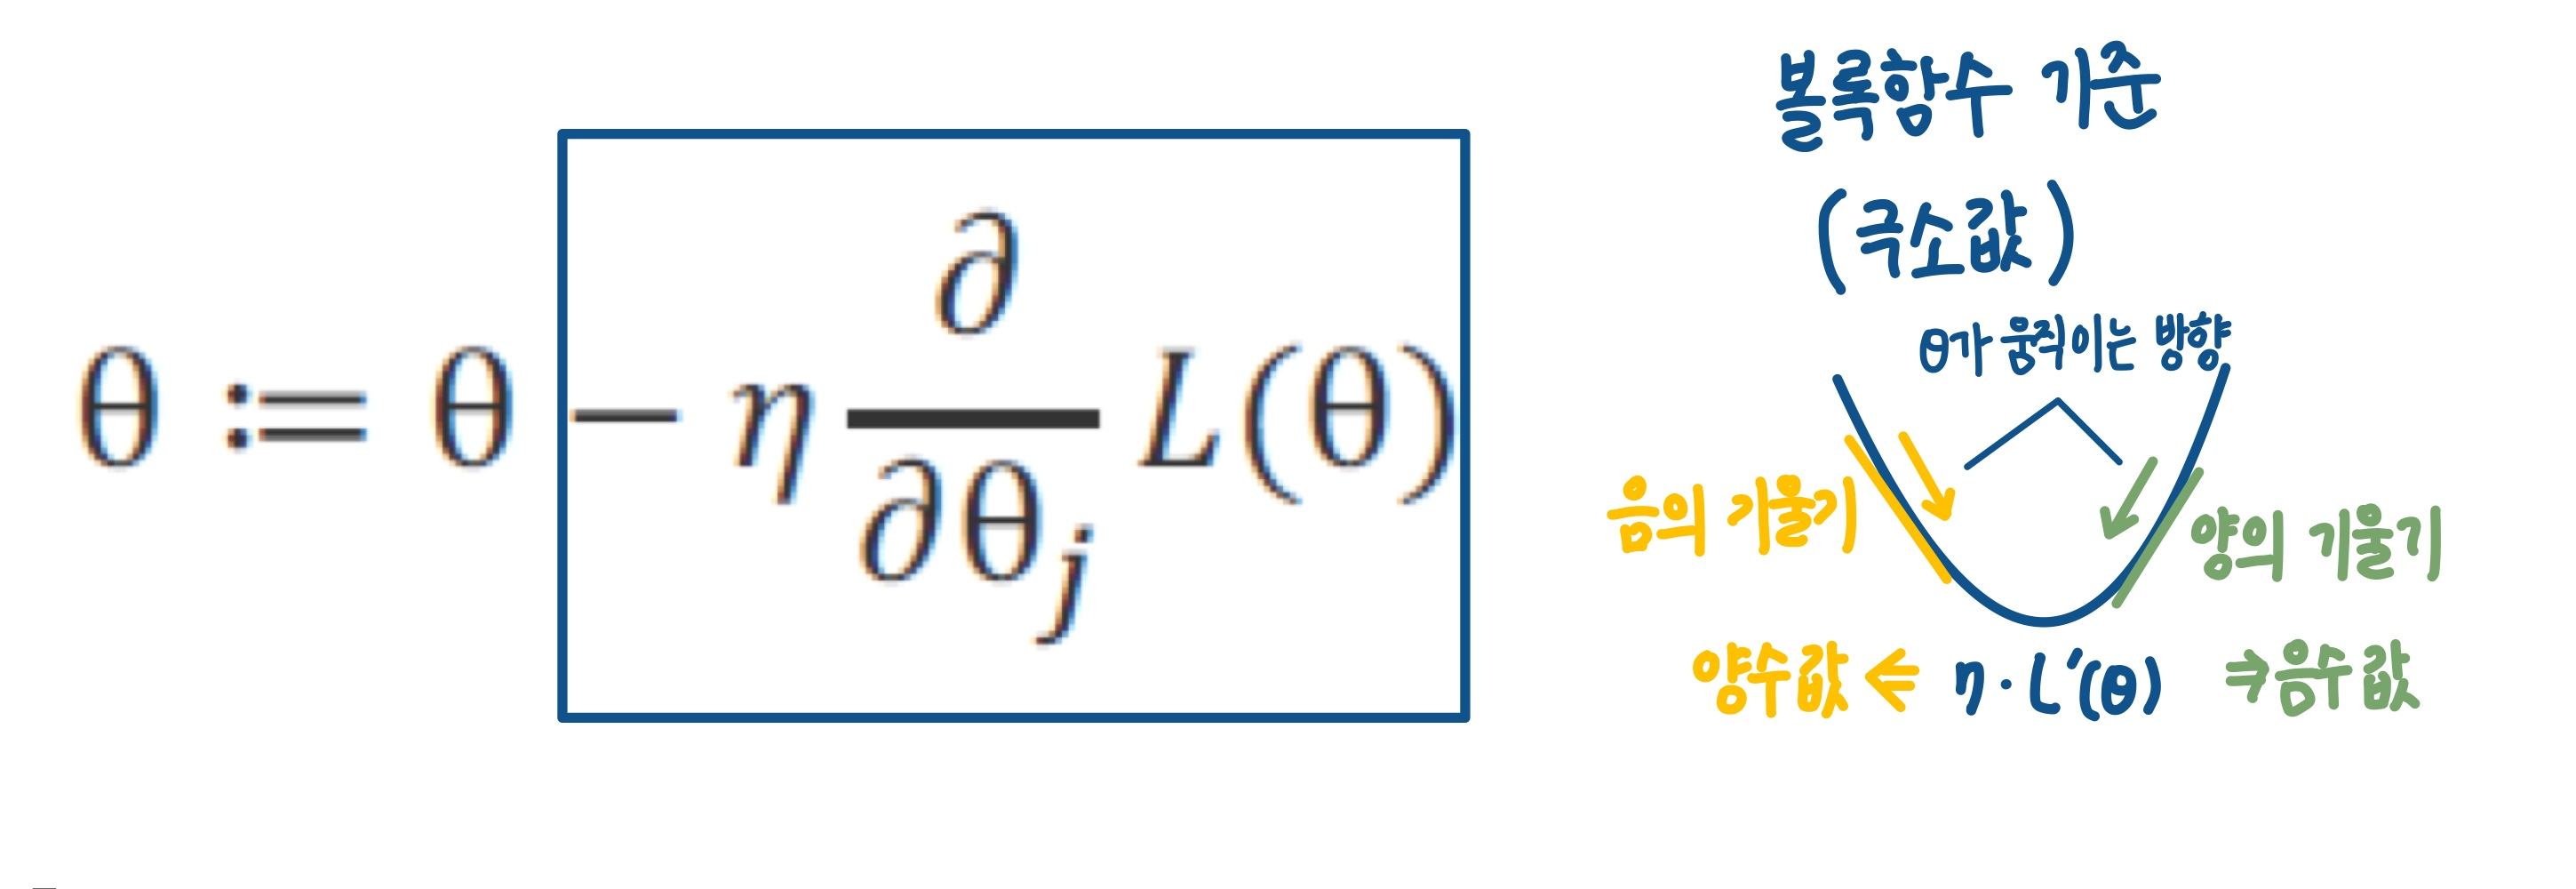

In [61]:
from IPython.display import Image
Image("C:/Users/User/Desktop/그래디언트.jpg")

## ${\partial\over{\partial \theta_j}}l(\theta)= -\Sigma(y_i - \theta^{T}X_i)x_{ij}$
## ${\partial\over{\partial \theta_j}}l(p)=-\Sigma(y_i - p_i)x_{ij}$

In [18]:
def get_gradient_ij(X, y, parameters, j, model): # X : i번째 데이터 / j: j번째 feature
    if model == 'linear':
        y_hat = dot_product(X, parameters.T)
        gradient = -(y-y_hat) * X[j]
    else:
        p = logistic(X, parameters)
        gradient = -(y - p) * X[j]
    return gradient

In [19]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'linear')

-0.03398441474003757

In [20]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.05748561175651162

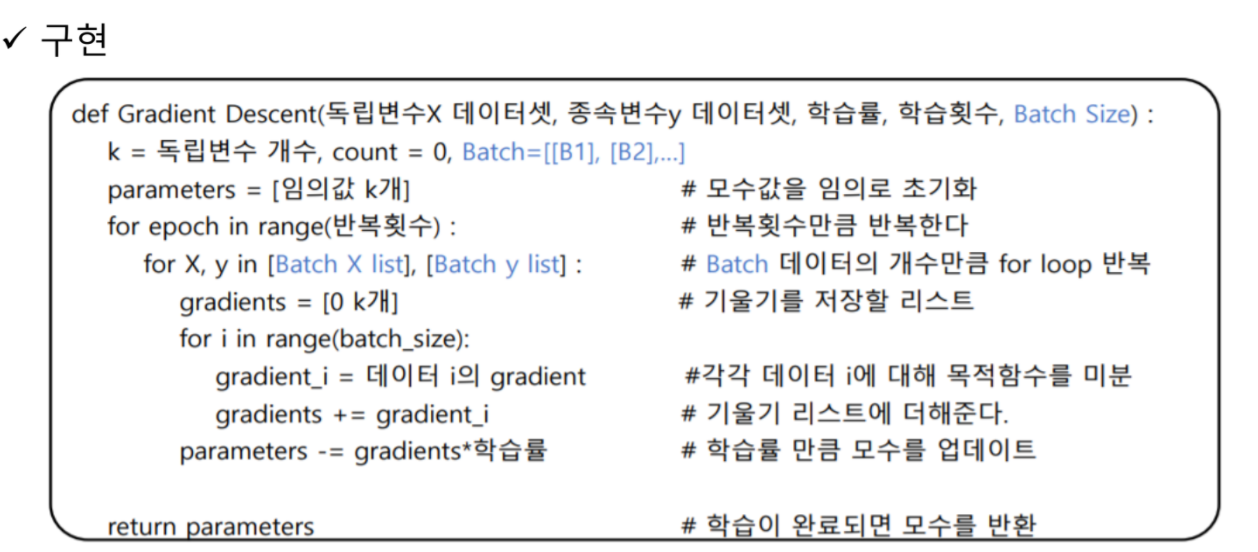

In [4]:
Image("C:/Users/rhskr/Desktop/배치알고리즘_구현.png")

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [21]:
gradients = [0 for _ in range(len(parameters))]
gradients

[0, 0, 0]

In [22]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]
    for i in range(len(X_set)) :
        X = X_set.iloc[i]; y = y_set.iloc[i]
        for j in range(len(parameters)) :
            gradients[j] += get_gradient_ij(X, y, parameters, j, model) 
            
    return gradients

In [23]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'linear')
gradients1

[107.20977761817542, 117.07322074338664, 132.48556463310086]

In [24]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[62.5521722602494, 6.512181389886982, 35.2562470662173]

## mini-batch
인덱스로 미니 배치 나누기

In [31]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명:

하나의 미니 배치는 여러 개의 랜덤 샘플로 구성된 데이터셋으로, 각 배치는 기울기를 1번 갱신할 떄 사용된다. 

x_train 의 크기가 N이며, batch_size는 하나의 데이터 묶음(배치)에 포함하고자 하는 샘플의 개수를 의미한다. 이때 미니 배치의 총 개수 nb는 (N // batch_size)+1로, 데이터 개수가 batch_size로 완전히 나누어 떨어지지 않은 경우도 고려한다.나머지가 존재하면, 배치 생성되고, 나머지 존재하지 않는다면 빈 미니배치 생성된다. 이렇게 빈 배치가 생성되지 않도록 for문에서 빈 배치는 제외하는 조건을 할당한다


## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [53]:
def step(parameters, gradients, learning_rate, n): #n: 현재 배치의 데이터 수
    for i in range(len(parameters)) :
        gradients[i] *= learning_rate / n
    parameters -= gradients
        
    return parameters

In [27]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.99056171, 0.70101417, 0.26651233])

## Learning rate (학습률) 
경사 하강법의 하이퍼파라미터로, 스텝의 크기,  속도를 유지하며 이동하는 거리의 시간
- 학습률이 너무 작은 경우 : 알고리즘이 수렴하기 위해서 반복을 많이 진행해야 하기 대문에 시간이 오래 걸린다
- 학습률이 너무 큰 경우 : 골짜기를 가로질러 반대편으로 건너뛰게 되어 이전보다 더 높은 곳으로 올라갈 수 있다 ⇒ 더 큰 값으로 발산 ⇒ 최적해 찾기에 실패
- 학습률이 필요 이상으로 많이 움직이게 되면, (그래프를 기준으로) MSE 값이 올라가게 되는 경우 조정할 수 있다.

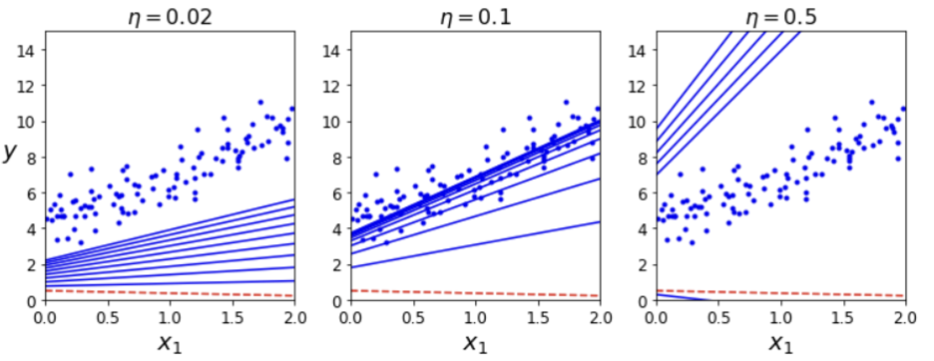

In [55]:
from IPython.display import Image

Image("C:\\Users\\User\\Desktop\\학습률.png")

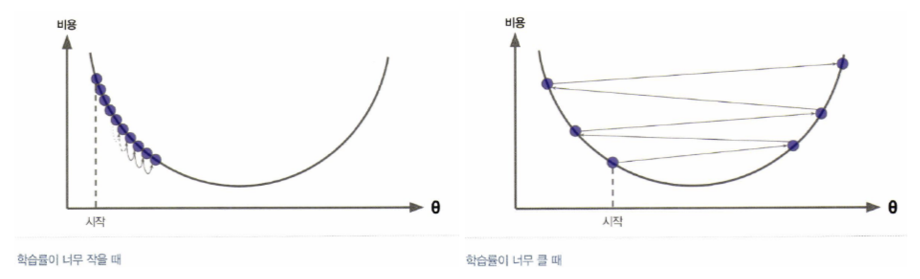

In [56]:
Image("C:\\Users\\User\\Desktop\\학습률2.png")

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 학습을 1번 진행할 때 (기울기를 1번 갱신할 때) 사용하는 데이터 묶음  
- epoch: train data를 모두 사용하여 학습했을 떄 1 epoch 완료 
- num_epoch: 학습할 총 에포크 수  
<br>

BGD: 한번에 모든 데이터 셋을 사용하여 그래디언트 계산<br>
SGD: 매 단계 마다 오직 하나의 single random instance를 선택 <br>
MGD: 여러 개의 random sample로 구성된 하나의 작은 미니 배치에 대해 그래디언트 계산 <br> 
<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  
batch_size=1 -> Stochastic Gradient Descent <br>
batch_size=k -> Mini Batch Gradient Descent<br>
batch_size=whole -> (Batch) Gradient Descent<br>

In [38]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)
    
    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            # 배치 당 그래디언트를 계산 -> 업데이트 -> loss 계산
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            params = step(parameters, gradients, learning_rate, len(X_batch))
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, len(X_batch))
            
            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss
        
        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수를 찾아보세요. 학습을 진행할 때, hyperparameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

default: learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16

In [39]:
new_param_bgd = gradient_descent(X_train, y_train, batch_size=X_train.shape[0])
new_param_bgd

epoch: 0  loss: 1.0804737073301267  params: [0.75855293 0.58935134 0.74386548]  gradients: [0.03601342598542956, 0.00905316957700748, 0.03067481881279961]
epoch: 100  loss: 0.4627595621565514  params: [-0.78331655  0.81778876 -0.72371006]  gradients: [0.004478184801607085, -0.006213053856697405, 0.00696602439676166]
epoch: 200  loss: 0.3959909375687153  params: [-1.02306021  1.35910289 -1.27573558]  gradients: [0.0013875237500723396, -0.004606751927502216, 0.0045245430454567605]
epoch: 300  loss: 0.363760841696331  params: [-1.13216577  1.75656931 -1.66365207]  gradients: [0.000906856838679963, -0.0034465547654427713, 0.0033475867111574784]
epoch: 400  loss: 0.3450347993351339  params: [-1.21304812  2.0614219  -1.95876915]  gradients: [0.0007301332421221731, -0.0027091304919735887, 0.0026140159191119757]
epoch: 500  loss: 0.3330791839282872  params: [-1.27998441  2.30554442 -2.19367724]  gradients: [0.0006155813754311844, -0.00220773741659404, 0.0021186705969152893]
epoch: 600  loss: 0

array([-1.49941305,  3.06152594, -2.91297762])

In [40]:
new_param_sgd = gradient_descent(X_train, y_train, batch_size=1)
new_param_sgd

epoch: 0  loss: 0.2690567947077215  params: [-0.90741765  1.15567682 -1.27459419]  gradients: [0.024386427754845, 0.013271117309026574, 0.017158064793629354]


array([-1.57413065,  3.21590762, -3.1129566 ])

In [41]:
new_param_mgd = gradient_descent(X_train, y_train)
new_param_mgd

epoch: 0  loss: 1.6415714115708526  params: [0.53353469 0.78936319 0.51107378]  gradients: [0.06673676319299478, 0.060341135268959345, 0.07532272996801545]
epoch: 100  loss: 0.1981944824106848  params: [-1.56216619  3.07330498 -3.0207079 ]  gradients: [0.007406602925442511, 0.010912746504411389, 0.014514787642838027]


array([-1.69641768,  3.5359069 , -3.43470102])

### Predict Label

In [42]:
# bgd 활용하여 학습한 parameters로 예측
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)

# 초기에 설정한 random parameters로 예측
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [43]:
from sklearn.metrics import *

In [44]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[38,  2],
       [ 4,  6]], dtype=int64)

In [45]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.88


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [46]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [47]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [48]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.50511503, 2.42176112])

In [49]:
#경사하강법
new_param = gradient_descent(X, y, model = 'linear')
new_param

epoch: 0  loss: 0.3419249508996141  params: [0.78391988 1.22307512]  gradients: [0.005755633069950546, -0.00025975077548473686]
epoch: 100  loss: 0.3525122691781024  params: [0.44644332 2.41552214]  gradients: [0.028702918261021202, 0.012484958047012704]
epoch: 200  loss: 0.3524239283368706  params: [0.44382882 2.42076506]  gradients: [0.0286752640247606, 0.012482854121499708]
epoch: 300  loss: 0.35242350317581894  params: [0.44381619 2.42079038]  gradients: [0.028675130472089704, 0.012482843960854917]
epoch: 400  loss: 0.3524235011225913  params: [0.44381613 2.4207905 ]  gradients: [0.028675129827113805, 0.01248284391178536]
epoch: 500  loss: 0.35242350111267534  params: [0.44381613 2.4207905 ]  gradients: [0.02867512982399897, 0.012482843911548382]
epoch: 600  loss: 0.35242350111262755  params: [0.44381613 2.4207905 ]  gradients: [0.028675129823983934, 0.012482843911547243]
epoch: 700  loss: 0.3524235011126273  params: [0.44381613 2.4207905 ]  gradients: [0.028675129823983857, 0.0124

array([0.44381613, 2.4207905 ])

In [50]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

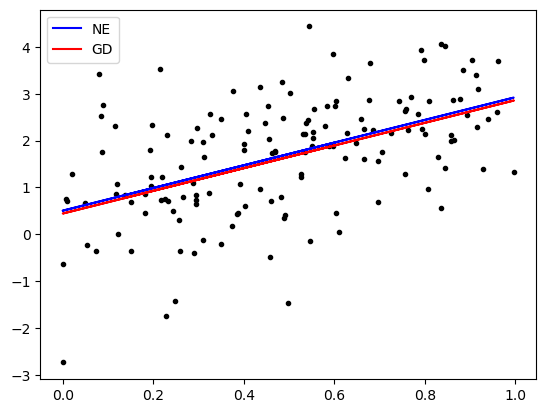

In [51]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()